In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_csv('../input/allflowmeterhikari2021v14/ALLFLOWMETER_HIKARI2022.csv')
df = df.drop(['Unnamed: 0','flow_duration', 'uid', 'originh', 'originp', 'responh', 'responp'], axis=1)
df.sample(10)

,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,attack_category,Label
171491,6,5,0,0,328.008863,273.340719,601.349582,0.833333,200,32,40,168,32,40,2,2,0,0,0,10,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,115.156174,1.726604e+04,1.833010e+04,3.666019e+03,7.604486e+03,0.000000,1.743913e+04,1.819921e+04,4.549801e+03,8.597661e+03,0.000000,1.726604e+04,1.833010e+04,1.833010e+03,5.424031e+03,0.000000,6.0,5.00,0.00,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,1.833010e+04,1.833010e+04,1.833010e+04,1.833010e+04,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64240,65160,63,64,Benign,0
168664,6,5,0,0,857.029832,714.191527,1571.221359,0.833333,200,32,40,168,32,40,2,2,0,0,0,10,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,184.774399,5.703926e+03,7.056952e+03,1.411390e+03,2.405791e+03,0.000000,5.959034e+03,6.430864e+03,1.607716e+03,2.904951e+03,0.000000,5.703926e+03,7.056952e+03,7.056952e+02,1.763570e+03,0.000000,6.0,5.00,0.00,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,7.056952e+03,7.056952e+03,7.056952e+03,7.056952e+03,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64240,65160,63,64,Benign,0
171039,11,10,3,5,0.180819,0.164381,0.345200,0.909091,360,32,40,328,32,40,2,2,0,3,5,20,0,0,0,0,0.0,517.0,835.0,75.909091,165.080862,0.0,2816.0,4074.0,407.400000,877.814356,0.0,2816.0,4909.0,233.761905,623.824246,0.000000,5.990076e+07,6.083707e+07,6.083707e+06,1.891034e+07,10.967255,5.981869e+07,6.083428e+07,6.759365e+06,1.989816e+07,0.000000,5.980971e+07,6.083707e+07,3.041854e+06,1.336248e+07,80.694501,5.5,5.00,417.50,2037.00,0.0,0.000000,0.0,0.0,0.0,0.000000,9.393907e+04,9.334249e+05,1.027364e+06,5.136820e+05,593606.161084,5.980971e+07,5.980971e+07,5.980971e+07,5.980971e+07,0.0,65535,65160,377,64,Benign,0
109233,6,4,0,0,1748.841140,1165.894093,2914.735233,0.666667,200,32,40,136,32,40,2,2,0,0,0,9,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,135.898590,2.418995e+03,3.455877e+03,6.911755e+02,9.693862e+02,162.839890,2.603054e+03,3.329992e+03,1.109997e+03,1.308497e+03,25.033951,2.418995e+03,3.455877e+03,3.839864e+02,7.699016e+02,0.000000,6.0,4.00,0.00,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,3.455877e+03,3.455877e+03,3.455877e+03,3.455877e+03,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64240,65160,63,64,Benign,0
56343,6,4,0,0,1779.887121,1186.591414,2966.478535,0.666667,200,32,40,136,32,40,2,2,0,0,0,9,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,226.020813,2.332926e+03,3.395081e+03,6.790161e+02,9.252568e+02,119.924545,2.606153e+03,3.175974e+03,1.058658e+03

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fwd_pkts_tot,228253.0,7.544996e+00,2.063005e+01,0.0,1.000000,6.000000,1.200000e+01,3.214000e+03
bwd_pkts_tot,228253.0,6.224299e+00,1.622458e+01,0.0,1.000000,5.000000,1.100000e+01,2.357000e+03
fwd_data_pkts_tot,228253.0,1.500913e+00,1.470135e+01,0.0,0.000000,0.000000,3.000000e+00,2.514000e+03
bwd_data_pkts_tot,228253.0,2.698269e+00,1.030832e+01,0.0,0.000000,0.000000,6.000000e+00,1.743000e+03
fwd_pkts_per_sec,228253.0,4.249762e+03,5.337921e+04,0.0,1.434792,64.759477,1.748720e+03,3.355443e+06
bwd_pkts_per_sec,228253.0,2.656370e+03,6.547922e+03,0.0,0.563013,58.353541,1.305707e+03,5.242880e+05
flow_pkts_per_sec,228253.0,6.906132e+03,5.448091e+04,0.0,1.962682,123.733911,3.083594e+03,3.355443e+06
down_up_ratio,228253.0,6.869020e-01,4.109304e-01,0.0,0.666667,0.833333,9.285710e-01,1.655556e+01
fwd_header_size_tot,228253.0,2.447868e+02,6.598387e+02,0.0,40.000000,200.000000,3.920000e+02,1.028560e+05
fwd_header_size_min,228253.0,3.104743e+01,8.824979e+00,0.0,32.000000,32.000000,3.200000e+01,4.400000e+01


In [ ]:
df.dtypes

fwd_pkts_tot                  int64
bwd_pkts_tot                  int64
fwd_data_pkts_tot             int64
bwd_data_pkts_tot             int64
fwd_pkts_per_sec            float64
bwd_pkts_per_sec            float64
flow_pkts_per_sec           float64
down_up_ratio               float64
fwd_header_size_tot           int64
fwd_header_size_min           int64
fwd_header_size_max           int64
bwd_header_size_tot           int64
bwd_header_size_min           int64
bwd_header_size_max           int64
flow_FIN_flag_count           int64
flow_SYN_flag_count           int64
flow_RST_flag_count           int64
fwd_PSH_flag_count            int64
bwd_PSH_flag_count            int64
flow_ACK_flag_count           int64
fwd_URG_flag_count            int64
bwd_URG_flag_count            int64
flow_CWR_flag_count           int64
flow_ECE_flag_count           int64
fwd_pkts_payload.min        float64
fwd_pkts_payload.max        float64
fwd_pkts_payload.tot        float64
fwd_pkts_payload.avg        

In [ ]:
df.nunique()

fwd_pkts_tot                   163
bwd_pkts_tot                   144
fwd_data_pkts_tot              100
bwd_data_pkts_tot              129
fwd_pkts_per_sec            125958
bwd_pkts_per_sec            116061
flow_pkts_per_sec           132039
down_up_ratio                  750
fwd_header_size_tot            717
fwd_header_size_min              9
fwd_header_size_max             11
bwd_header_size_tot            384
bwd_header_size_min              8
bwd_header_size_max             10
flow_FIN_flag_count             37
flow_SYN_flag_count              8
flow_RST_flag_count             11
fwd_PSH_flag_count              77
bwd_PSH_flag_count             114
flow_ACK_flag_count            220
fwd_URG_flag_count               1
bwd_URG_flag_count               1
flow_CWR_flag_count              3
flow_ECE_flag_count              2
fwd_pkts_payload.min           108
fwd_pkts_payload.max           356
fwd_pkts_payload.tot          1025
fwd_pkts_payload.avg          2426
fwd_pkts_payload.std

In [ ]:
df.dtypes

fwd_pkts_tot                  int64
bwd_pkts_tot                  int64
fwd_data_pkts_tot             int64
bwd_data_pkts_tot             int64
fwd_pkts_per_sec            float64
bwd_pkts_per_sec            float64
flow_pkts_per_sec           float64
down_up_ratio               float64
fwd_header_size_tot           int64
fwd_header_size_min           int64
fwd_header_size_max           int64
bwd_header_size_tot           int64
bwd_header_size_min           int64
bwd_header_size_max           int64
flow_FIN_flag_count           int64
flow_SYN_flag_count           int64
flow_RST_flag_count           int64
fwd_PSH_flag_count            int64
bwd_PSH_flag_count            int64
flow_ACK_flag_count           int64
fwd_URG_flag_count            int64
bwd_URG_flag_count            int64
flow_CWR_flag_count           int64
flow_ECE_flag_count           int64
fwd_pkts_payload.min        float64
fwd_pkts_payload.max        float64
fwd_pkts_payload.tot        float64
fwd_pkts_payload.avg        

In [ ]:
y = df['Label']
X = df.drop(['Label', 'attack_category'], axis=1)

del df

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=y)

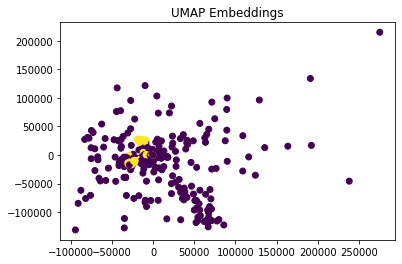

In [ ]:
from cuml import UMAP
from sklearn.preprocessing import QuantileTransformer

continuous_cols = [col for col in X_train.columns if X_train[col].nunique() > 100]

quantile_transformer = QuantileTransformer()
X_train[continuous_cols] = quantile_transformer.fit_transform(X_train[continuous_cols])
X_val[continuous_cols] = quantile_transformer.transform(X_val[continuous_cols])

umap = UMAP(n_neighbors=50,
            min_dist=0.5,
            spread=1.5,
            target_weight=1)
train_embedding = umap.fit_transform(X_train, y_train)
val_embedding = umap.transform(X_val)

plt.title("UMAP Embeddings")
plt.scatter(*train_embedding.T, c=y_train)

In [ ]:
from cuml.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report, precision_recall_curve

val_preds = knn_clf.predict_proba(X_val)[:, -1]

precision, recall, thresholds = precision_recall_curve(y_val, val_preds)
f1_scores = 2*recall*precision/(recall+precision)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f'Best threshold\t\t: {best_threshold}')
print(f'AUC score\t\t: {roc_auc_score(y_val, val_preds)}\n')

val_preds[val_preds > best_threshold] = 1
val_preds[val_preds <= best_threshold] = 0

print(classification_report(y_val, val_preds))

Best threshold		: 0.4000000059604645
AUC score		: 0.9941315982578138

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     42981
           1       0.76      0.99      0.86      2670

    accuracy                           0.98     45651
   macro avg       0.88      0.99      0.92     45651
weighted avg       0.99      0.98      0.98     45651

